In [1]:
# All imports should be in first cell
import cartopy
import imp
import matplotlib.pyplot as plt
import matplotlib.colors
%matplotlib inline
import numpy as np
import ThinWalls
import GMesh

In [2]:
imp.reload(ThinWalls);

In [3]:
# Colormap for plots
cmap = plt.cm.seismic
norm = matplotlib.colors.BoundaryNorm(np.linspace(0,1,3),cmap.N)

# 4x2 target grid with 8x4 topographic data containing a test walls

Pathways given in figure 5 of http://dx.doi.org/10.1016/j.ocemod.2013.03.002.

<img src="https://ars.els-cdn.com/content/image/1-s2.0-S1463500313000425-gr5.jpg">

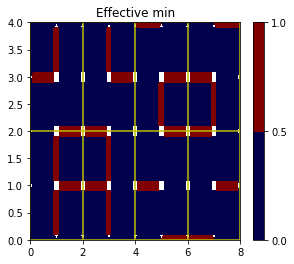

In [4]:
ni,nj = 8,4
FG = ThinWalls.ThinWalls(lon=np.linspace(0,ni,ni+1), lat=np.linspace(0,nj,nj+1))
FG.set_cell_mean( np.zeros((nj,ni)) )
FG.set_edge_mean(
    np.array(
[
    [0,1,0,1,0,0,0,0,0],
    [0,1,0,1,0,0,0,0,0],
    [0,0,0,0,0,1,0,1,0],
    [0,1,0,1,0,0,0,0,0]
]),
    np.array(
[
    [0,0,0,0,0,1,1,0],
    [0,1,1,0,1,0,0,1],
    [0,1,1,0,0,1,1,0],
    [1,0,0,1,0,1,1,0],
    [0,0,0,0,1,0,0,1]
])
)

FG.init_effective_values()

plt.figure(figsize=(16,4))
ax = plt.subplot(131); plt.colorbar(
    FG.plot(ax, norm=norm, cmap=cmap, measure='effective', metric='min'), ax=ax); plt.title('Effective min');
GMesh.GMesh(lon=np.linspace(0,ni,ni//2+1), lat=np.linspace(0,nj,nj//2+1)).plot(ax,linecolor='y') # Will be target grid

Diagnose NS pathways

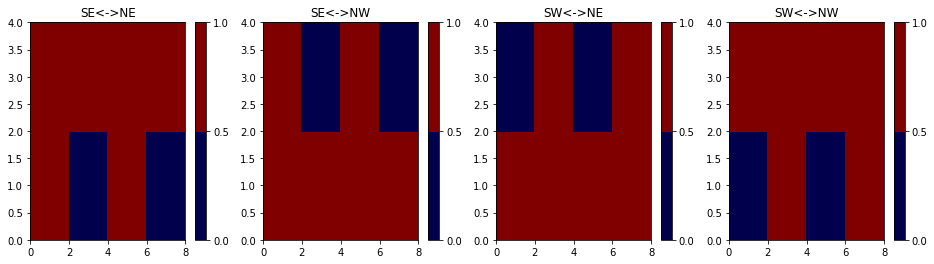

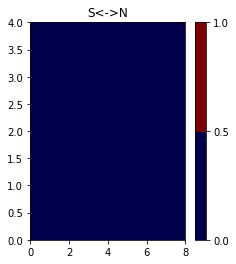

In [5]:
se2ne,se2nw,sw2ne,sw2nw = FG.diagnose_NS_pathways()
CM = GMesh.GMesh(lon=np.linspace(0,ni,ni//2+1), lat=np.linspace(0,nj,nj//2+1))
ns = FG.diagnose_NS_pathway()

plt.figure(figsize=(16,4))
ax = plt.subplot(141); plt.colorbar(
    CM.pcolormesh(ax, se2ne, norm=norm, cmap=cmap), ax=ax); plt.title('SE<->NE');
ax = plt.subplot(142); plt.colorbar(
    CM.pcolormesh(ax, se2nw, norm=norm, cmap=cmap), ax=ax); plt.title('SE<->NW');
ax = plt.subplot(143); plt.colorbar(
    CM.pcolormesh(ax, sw2ne, norm=norm, cmap=cmap), ax=ax); plt.title('SW<->NE');
ax = plt.subplot(144); plt.colorbar(
    CM.pcolormesh(ax, sw2nw, norm=norm, cmap=cmap), ax=ax); plt.title('SW<->NW');

plt.figure(figsize=(16,4))
ax = plt.subplot(141); plt.colorbar(
    CM.pcolormesh(ax, ns, norm=norm, cmap=cmap), ax=ax); plt.title('S<->N');

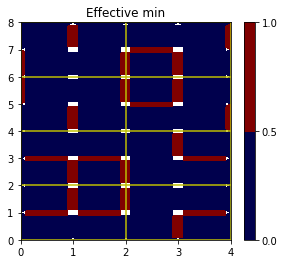

In [6]:
FG.transpose()

plt.figure(figsize=(16,4))
ax = plt.subplot(131); plt.colorbar(
    FG.plot(ax, norm=norm, cmap=cmap, measure='effective', metric='min'), ax=ax); plt.title('Effective min');
GMesh.GMesh(lon=np.linspace(0,nj,nj//2+1), lat=np.linspace(0,ni,ni//2+1)).plot(ax,linecolor='y') # Will be target grid

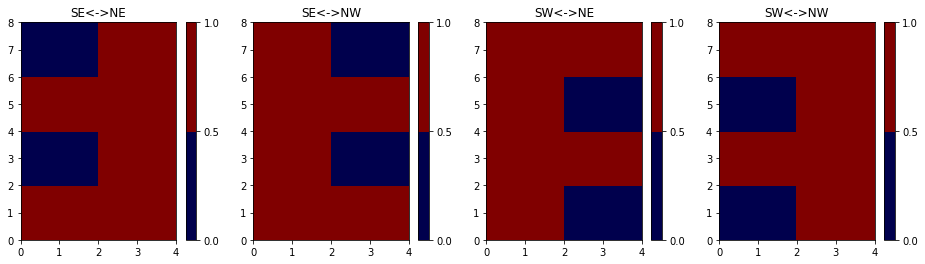

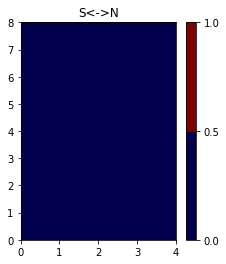

In [7]:
wn2en,wn2es,ws2en,ws2es = FG.diagnose_EW_pathways()
CM = GMesh.GMesh(lon=np.linspace(0,nj,nj//2+1), lat=np.linspace(0,ni,ni//2+1))
ew = FG.diagnose_EW_pathway()

plt.figure(figsize=(16,4))
ax = plt.subplot(141); plt.colorbar(
    CM.pcolormesh(ax, wn2en, norm=norm, cmap=cmap), ax=ax); plt.title('SE<->NE');
ax = plt.subplot(142); plt.colorbar(
    CM.pcolormesh(ax, wn2es, norm=norm, cmap=cmap), ax=ax); plt.title('SE<->NW');
ax = plt.subplot(143); plt.colorbar(
    CM.pcolormesh(ax, ws2en, norm=norm, cmap=cmap), ax=ax); plt.title('SW<->NE');
ax = plt.subplot(144); plt.colorbar(
    CM.pcolormesh(ax, ws2es, norm=norm, cmap=cmap), ax=ax); plt.title('SW<->NW');

plt.figure(figsize=(16,4))
ax = plt.subplot(141); plt.colorbar(
    CM.pcolormesh(ax, ew, norm=norm, cmap=cmap), ax=ax); plt.title('S<->N');